In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [24]:
# 1. LOAD DATASET
# ================================================================
df = pd.read_csv("winequalityN.csv")
print("=== Preview Dataset ===")
print(df.head(), "\n")

print("=== Info Data ===")
print(df.info(), "\n")

=== Preview Dataset ===
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.

=== Statistik Deskriptif ===
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000 

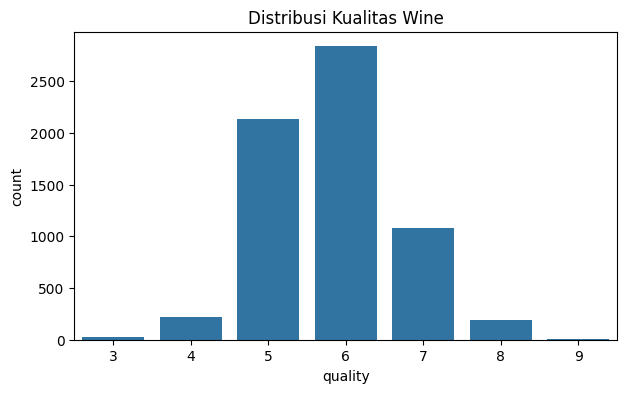

In [25]:
# 2. EDA (EXPLORATORY DATA ANALYSIS)
# ================================================================
print("=== Statistik Deskriptif ===")
print(df.describe(), "\n")

print("Missing Values:")
print(df.isnull().sum(), "\n")

plt.figure(figsize=(7,4))
sns.countplot(x=df['quality'])
plt.title("Distribusi Kualitas Wine")
plt.show()

In [26]:
# 3. PREPROCESSING
# ================================================================

# 3.1 HANDLE MISSING VALUES
df = df.fillna(df.median(numeric_only=True))

# 3.2 ENCODE KOLOM KATEGORI 'type'
if 'type' in df.columns:
    le = LabelEncoder()
    df['type'] = le.fit_transform(df['type'])   # red=0, white=1

In [27]:
# 4. DEFINISI FITUR DAN TARGET
# ================================================================
X = df.drop('quality', axis=1)
y = df['quality']

# Buat label kategori
# 0 = rendah, 1 = sedang, 2 = tinggi
y = y.apply(lambda q: 0 if q <= 4 else (1 if q <= 6 else 2))

In [28]:
# 5. SPLIT DATA
# ================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [30]:
# 6. SCALING DATA
# ================================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# 7. TRAINING RANDOM FOREST
# ================================================================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

=== AKURASI MODEL ===
Accuracy: 0.8515384615384616 

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.83      0.10      0.18        49
           1       0.86      0.96      0.91       995
           2       0.79      0.57      0.66       256

    accuracy                           0.85      1300
   macro avg       0.83      0.55      0.58      1300
weighted avg       0.85      0.85      0.83      1300



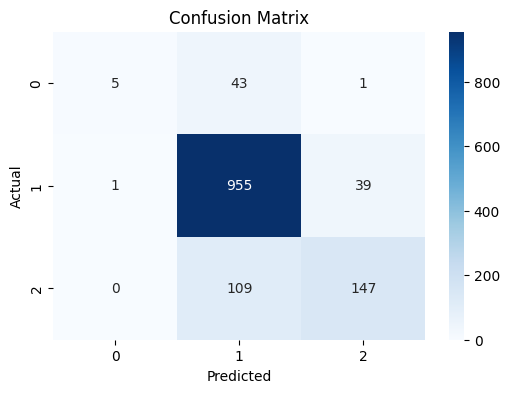

In [32]:
# 8. EVALUASI MODEL
# ================================================================
y_pred = model.predict(X_test_scaled)

print("=== AKURASI MODEL ===")
print("Accuracy:", accuracy_score(y_test, y_pred), "\n")

print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
# 9. HASIL PREDIKSI ACTUAL VS PREDICTED
# ================================================================
result = X_test.copy()
result["Actual"] = y_test.values
result["Predicted"] = y_pred

print("=== Contoh Hasil Prediksi ===")
print(result.head(20))

# Buat file csv jika ingin dipakai laporan
result.to_csv("hasil_prediksi_wine.csv", index=False)


=== Contoh Hasil Prediksi ===
      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
2060     1            6.8             0.280         0.44            11.5   
4040     1            6.3             0.240         0.29             1.6   
2594     1            5.4             0.500         0.13             5.0   
4381     1            6.4             0.300         0.27             5.0   
4961     0            7.0             0.735         0.05             2.0   
859      1            6.6             0.300         0.30             4.8   
4047     1            6.9             0.190         0.35            13.5   
5443     0            9.1             0.470         0.49             2.6   
6190     0            5.9             0.395         0.13             2.4   
5641     0           11.6             0.410         0.58             2.8   
3973     1            6.3             0.270         0.51             7.6   
4626     1            6.3             0.300         0.91  

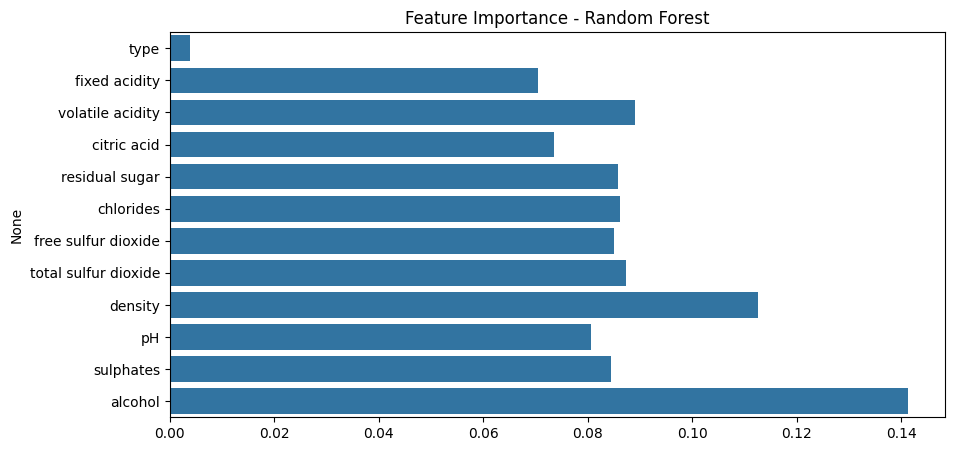

In [34]:
# 10. FEATURE IMPORTANCE
# ================================================================
importance = model.feature_importances_
plt.figure(figsize=(10,5))
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance - Random Forest")
plt.show()

In [35]:
# 11. SAVE MODEL UNTUK FLASK (JOBLIB)
# ================================================================
joblib.dump(model, "wine_quality_model.joblib")
joblib.dump(scaler, "scaler.joblib")

print("\nFILE MODEL TERSIMPAN:")
print(" - wine_quality_model.joblib")
print(" - scaler.joblib")


FILE MODEL TERSIMPAN:
 - wine_quality_model.joblib
 - scaler.joblib
